# AIVANCITY : Coding for AI and Data Science
Marie Couvé - confidential

Your name :Likhita Yerra

## Lecture 5 : Classification with Scikit learn



**Don't forget to comment everything you code and analyze your results**

## Presentation of Dataset

The Adult Census Dataset contains informations about individuals and their income.

Link for more information: https://www.kaggle.com/datasets/uciml/adult-census-income/data


The problematic is: "we want to predict wether a personn earns more or less thant 50k a year".

### Start by importing the librairies


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Classification models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV

# Evaluation
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.metrics import precision_recall_curve, roc_curve, auc


## Step 1: Data preparation

### Read the dataset

In [2]:
# Load data
df = pd.read_csv("adult.csv")


### Explore the dataset

In [3]:
df.head(10)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,>50K
8,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States,<=50K
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,?,>50K


In [4]:
# Get some information
print(df.shape)
print(df.describe())


(32561, 15)
                age        fnlwgt  education.num  capital.gain  capital.loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours.per.week  
count    32561.000000  
mean        40.437456  
std         12.347429  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000  


### Clean the dataset

#### Missing values

In [5]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)


age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64


In [6]:
# Check the dataset to see how missing values are represented
# Convert them to NaN and check again
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Column '{column}': {unique_values}")

df.replace('?', np.nan, inplace=True)

Column 'age': [90 82 66 54 41 34 38 74 68 45 52 32 51 46 57 22 37 29 61 21 33 49 23 59
 60 63 53 44 43 71 48 73 67 40 50 42 39 55 47 31 58 62 36 72 78 83 26 70
 27 35 81 65 25 28 56 69 20 30 24 64 75 19 77 80 18 17 76 79 88 84 85 86
 87]
Column 'workclass': ['?' 'Private' 'State-gov' 'Federal-gov' 'Self-emp-not-inc' 'Self-emp-inc'
 'Local-gov' 'Without-pay' 'Never-worked']
Column 'fnlwgt': [ 77053 132870 186061 ...  34066  84661 257302]
Column 'education': ['HS-grad' 'Some-college' '7th-8th' '10th' 'Doctorate' 'Prof-school'
 'Bachelors' 'Masters' '11th' 'Assoc-acdm' 'Assoc-voc' '1st-4th' '5th-6th'
 '12th' '9th' 'Preschool']
Column 'education.num': [ 9 10  4  6 16 15 13 14  7 12 11  2  3  8  5  1]
Column 'marital.status': ['Widowed' 'Divorced' 'Separated' 'Never-married' 'Married-civ-spouse'
 'Married-spouse-absent' 'Married-AF-spouse']
Column 'occupation': ['?' 'Exec-managerial' 'Machine-op-inspct' 'Prof-specialty'
 'Other-service' 'Adm-clerical' 'Craft-repair' 'Transport-moving'
 'Han

In [7]:
# Can you remove the rows with missing values ?
df.dropna()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


### Explore the dataset (plot)

In [8]:
# Explore the dataset as needed to understand the features
print("First 5 rows of the dataset:")
print(df.head())



First 5 rows of the dataset:
   age workclass  fnlwgt     education  education.num marital.status  \
0   90       NaN   77053       HS-grad              9        Widowed   
1   82   Private  132870       HS-grad              9        Widowed   
2   66       NaN  186061  Some-college             10        Widowed   
3   54   Private  140359       7th-8th              4       Divorced   
4   41   Private  264663  Some-college             10      Separated   

          occupation   relationship   race     sex  capital.gain  \
0                NaN  Not-in-family  White  Female             0   
1    Exec-managerial  Not-in-family  White  Female             0   
2                NaN      Unmarried  Black  Female             0   
3  Machine-op-inspct      Unmarried  White  Female             0   
4     Prof-specialty      Own-child  White  Female             0   

   capital.loss  hours.per.week native.country income  
0          4356              40  United-States  <=50K  
1          4356  

In [9]:
# Analyse the classes
# How many classes? Are they balanced?
class_counts = df['income'].value_counts()
print("\nClass distribution in 'income' column:")
print(class_counts)



Class distribution in 'income' column:
<=50K    24720
>50K      7841
Name: income, dtype: int64


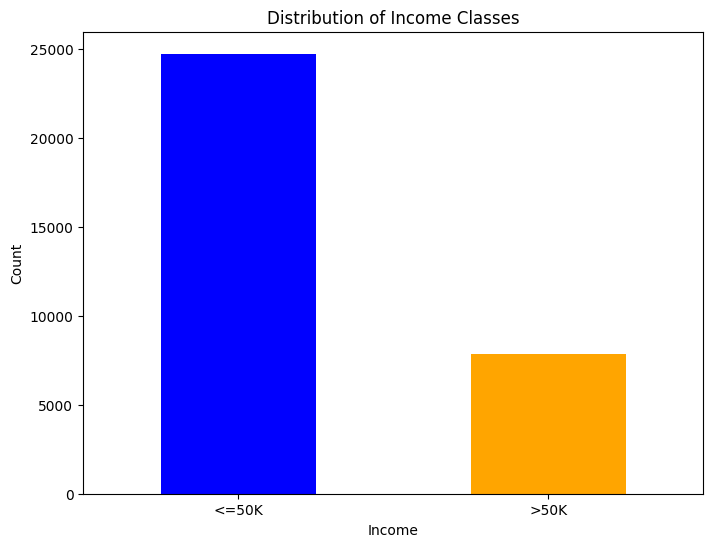

In [10]:
# Make a plot to vizualize the classes
plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar', color=['blue', 'orange'])
plt.title("Distribution of Income Classes")
plt.xlabel("Income")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

### Separate features from label


In [11]:
# Get the features and label in two variables.
X = df.drop(columns=['income'])
y = df['income']

In [12]:
# Convert label into numerical values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

### Train / test split

In [13]:
# Split the features and label in train and test set

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)


In [14]:
# Print the shape of each
# Check that X and y of each set have the same number of samples

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (26048, 14)
Shape of X_test: (6513, 14)
Shape of y_train: (26048,)
Shape of y_test: (6513,)


In [15]:
if X_train.shape[0] == y_train.shape[0] and X_test.shape[0] == y_test.shape[0]:
    print("Number of samples in X and y of each set match.")
else:
    print("Number of samples in X and y do not match.")

Number of samples in X and y of each set match.


In [16]:
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight('balanced', classes=[0, 1], y=y_encoded)


## Step 2.1: 1st Model Training

Train your model on only numerical features. We will see after how to use the other features.

You can use LogisticRegression to begin with.

In [17]:
# Select only numerical features
X = df.select_dtypes(include=['int64', 'float64'])  # Select only numerical features
y = df['income']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Train the Logistic Regression model
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train, y_train)

# Make predictions
y_pred = logistic_regression_model.predict(X_test)

# Compute the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy of 1st Model (Numerical Features):", accuracy)

Accuracy of 1st Model (Numerical Features): 0.798710271764164


**Observations :**
How is your accuracy? Is it good? Can you do better?

-good,room for improvement
-

## Let's try to improve the score

### Feature Engineering

The model can only understand numerical values. In your data exploration, you should have noticed some categorical features.

To be able to use them for our model, we need to convert them into numerical values (understandable by the model). That's **encoding**.



---

Attention !

When doing data transformation, you always want to fit your transformer on the training data and use it to transform all your data.

In [18]:

X = df.drop(columns=['income'])
y = df['income']
# Select the categorical features
categorical_features = X.select_dtypes(include=['object'])

# Use LabelEncoder to encode the categorical features
label_encoder = LabelEncoder()
X_encoded = categorical_features.apply(label_encoder.fit_transform)



In [19]:
# Check the results
print("Encoded Categorical Features:")
print(X_encoded.head())



Encoded Categorical Features:
   workclass  education  marital.status  occupation  relationship  race  sex  \
0          8         11               6          14             1     4    0   
1          3         11               6           3             1     4    0   
2          8         15               6          14             4     2    0   
3          3          5               0           6             4     4    0   
4          3         15               5           9             3     4    0   

   native.country  
0              38  
1              38  
2              38  
3              38  
4              38  


## Step 2.2: 2nd Model Training

Train your model on all features.

Use the same model as before to see the difference (LogisticRegression)

In [20]:
# Combine the encoded categorical features with numerical features
X_combined = pd.concat([X_encoded, X.select_dtypes(include=['int64', 'float64'])], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)

# Train the Logistic Regression model
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train, y_train)

# Make predictions
y_pred = logistic_regression_model.predict(X_test)

# Compute the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

print("\nAccuracy of 2nd Model (All Features):", accuracy)




Accuracy of 2nd Model (All Features): 0.7918010133578995


**Observations :**
How is your accuracy? Is it better? Can you do better?

-lower than before
-

## Step 3: Evaluate your model

### Compute classification scores

In [21]:
# Compute the confusion matrix
confusion_matrix_result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_matrix_result)



Confusion Matrix:
[[4731  245]
 [1111  426]]


### Compute the ROC Curve

You can use this curve to choose the threshold of your classification.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


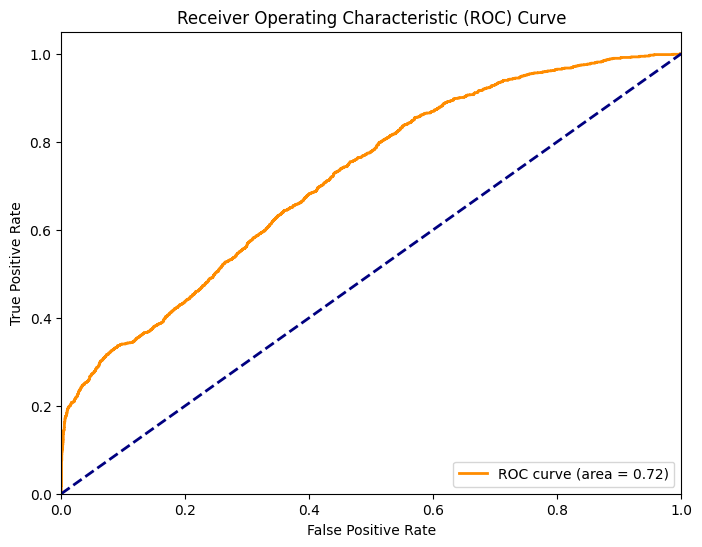

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("adult.csv")

# Separate features from label
X = df.drop(columns=['income'])
y = df['income']

# Encode the label into numerical values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Create a binary target variable: 1 for '>50K' and 0 for '<=50K'
binary_y = (y_encoded == label_encoder.transform(['>50K'])[0]).astype(int)

# Select the categorical features
categorical_features = X.select_dtypes(include=['object'])

# Use LabelEncoder to encode the categorical features
label_encoder = LabelEncoder()
X_encoded = categorical_features.apply(label_encoder.fit_transform)

# Combine the encoded categorical features with numerical features
X_combined = pd.concat([X_encoded, X.select_dtypes(include=['int64', 'float64'])], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_combined, binary_y, test_size=0.2, random_state=42)

# Train the Logistic Regression model
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train, y_train)

# Predict the probabilities for the positive class
y_prob = logistic_regression_model.predict_proba(X_test)[:, 1]

# Compute the values for the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)

# Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


**Observations :**

What can you say about the metrics and curve? Is your model good?

-fair discrimination capacity
-


### Compute the Precision-Recall Curve

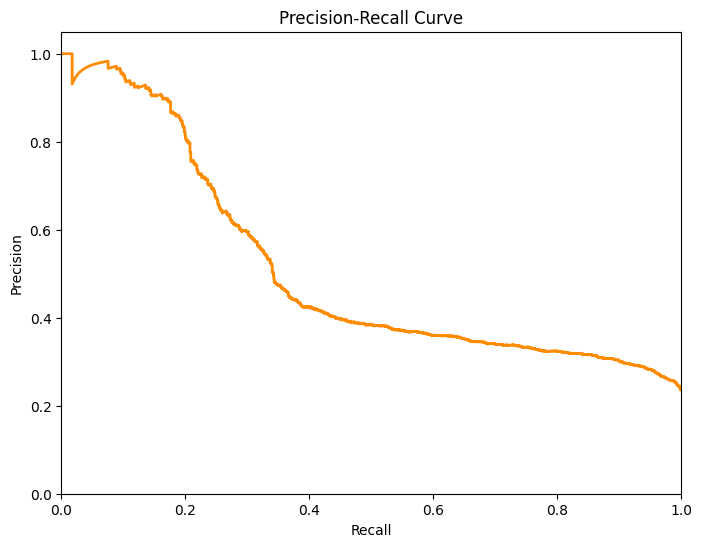

In [23]:
# Predict the probabilities for the positive class
y_prob = logistic_regression_model.predict_proba(X_test)[:, 1]

# Compute the values for the Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)

# Plot the Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='darkorange', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

**Observations :**

What can you say about the metrics and curve? Is your model good?

-
-model has some abilities to discriminates between classes


**Final conclusion :**

What's the most appropriate metric for this classification problem?
What can you say about the results?

-the "best" metric is the one that aligns most closely with the goals and costs associated with the specific classification task at hand.
-

## Bonus: Other Model Training

Try other classification models.

You can also try tuning the parameters. Look at the documentation to explore the paramaters and their possible values.

Look at the GridSearchCV function to try many parameters combinations and models.

### Try different models and parameters

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


In [25]:
# Load the dataset
df = pd.read_csv("adult.csv")

# Separate features from label
X = df.drop(columns=['income'])
y = df['income']

# Encode the label into numerical values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Create a binary target variable: 1 for '>50K' and 0 for '<=50K'
binary_y = (y_encoded == label_encoder.transform(['>50K'])[0]).astype(int)

# Select the categorical features
categorical_features = X.select_dtypes(include=['object'])


In [26]:
# Use LabelEncoder to encode the categorical features
label_encoder = LabelEncoder()
X_encoded = categorical_features.apply(label_encoder.fit_transform)

# Combine the encoded categorical features with numerical features
X_combined = pd.concat([X_encoded, X.select_dtypes(include=['int64', 'float64'])], axis=1)


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_combined, binary_y, test_size=0.2, random_state=42)


In [ ]:
# Scale the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define a list of models to try
models_to_try = [
    ("Logistic Regression", LogisticRegression(max_iter=1000)),  # Increase max_iter as needed
    ("Decision Tree", DecisionTreeClassifier()),
    ("Random Forest", RandomForestClassifier()),
    ("SVM", SVC())
]

# Define parameter grids for each model
param_grids = {
    "Logistic Regression": {'C': [0.001, 0.01, 0.1, 1, 10, 100]},
    "Decision Tree": {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10]},
    "Random Forest": {'n_estimators': [10, 50, 100, 200], 'max_depth': [None, 10, 20, 30]},
    "SVM": {'C': [0.001, 0.01, 0.1, 1, 10], 'kernel': ['linear', 'rbf']}
}

best_model = None
best_accuracy = 0.0
best_parameters = {}

# Iterate over models and tune parameters
for model_name, model in models_to_try:
    param_grid = param_grids[model_name]
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train_scaled, y_train)

    # Get the best parameters and accuracy
    best_params = grid_search.best_params_
    accuracy = grid_search.best_score_

    # Check if this model is better than the previous best model
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model_name
        best_parameters = best_params

# Print the best model and its parameters
print(f"Best Model: {best_model}")
print(f"Best Parameters: {best_parameters}")

# Instantiate the best model with the best parameters and train it
best_model = LogisticRegression(**best_parameters, max_iter=1000)  # Increase max_iter as needed
best_model.fit(X_train_scaled, y_train)

# Predict and evaluate accuracy on the test set
y_pred = best_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Best Model: {accuracy}")
